## Fandango Movie Rating Analysis ##
**Have Fandango corrected their rating bias following the article published by Walt Hickey?**

Comparison of Fandango movie ratings before and after the article, thanks to Walt Hickey's dataset available on Github (fandango_score_comparison.csv) and a dataset by Dataquest team members covering a period after the article (movie_ratings_16_17.csv)

The two datasets were not generated with the same process and logic, which introduces a bias: on the one hand the movies with 30 or more reviews of 2015 were selected, and on the other, movies with a 'significant number of votes' were selected

In [13]:
import pandas as pd

fandango_before = pd.read_csv('fandango_score_comparison.csv')
fandango_after = pd.read_csv('movie_ratings_16_17.csv')

In [14]:
#fandango_after.info()
#fandango_before.info()
#fandango_before.tail()

# Data refinement #

**Removing 2017 ratings**
The 2017 ratings are subject to changes, given the date of the sampling. It should be removed from the datset

In [15]:
fandango_after = fandango_after[fandango_after['year'] == 2016]

**Restricting Fandango dataset to 2015 movies**
Let us restrict the Fandango ratings to 2015 movies, in order to compare movies of one year to movies of the next year

*Split the 'Film' values to isolate the year information*

In [16]:
fandango_before['year'] = fandango_before['FILM'].str[-5:-1].astype(int)

In [17]:
#fandango_before['year']

In [18]:
fandango_before = fandango_before[fandango_before['year'] == 2015]

## Popular ratings definition and selection?? ##

The original datset is based on movies with 30 reviews or more. We double check that is the case, and take that threshold to filetr out movies with less ratings in the latest dataset

In [19]:
#fandango_before['Fandango_votes'].value_counts().sort_index()
#We confirm all movies have 30 or more ratings in the orginial dataset

In [20]:
#fandango_after doesn't provide information on number of user ratings for movies. We are stuck on this filtering and proceed

## Analysis of ratings ##

**Kernel density plots**

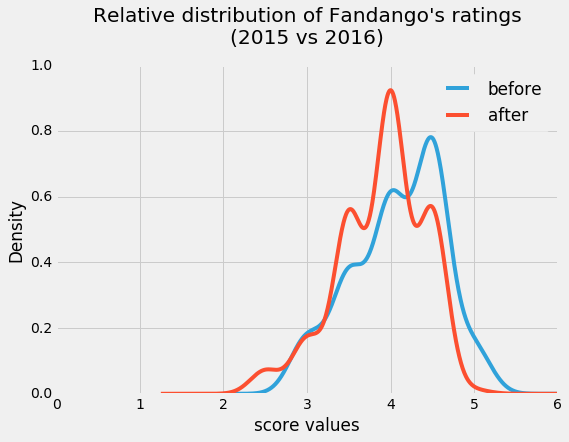

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_before['Fandango_Stars'].plot.kde(label='before', figsize=(8, 5.5))
fandango_after['fandango'].plot.kde(label='after')

plt.xlabel('score values')
plt.title("Relative distribution of Fandango's ratings\n(2015 vs 2016)",
          y = 1.05) # the `y` parameter pads the title upward
plt.legend()
plt.xlim(0,6)
plt.show()

# Observations #

While both datasets show left skewed ratings, there is a change from before (2015) to after (2016).
The ratings have decreased overall with a shift of the highest rates to lower values as well as the peak of the distributiion

## Granular analysis ##

In [22]:
print('BEFORE')
round(fandango_before['Fandango_Stars'].value_counts(normalize=True).sort_index()*100, 2)

BEFORE


3.0     8.53
3.5    17.83
4.0    28.68
4.5    37.98
5.0     6.98
Name: Fandango_Stars, dtype: float64

In [23]:
print('AFTER')
round(fandango_after['fandango'].value_counts(normalize=True).sort_index()*100, 2)
#(fandango_before['Fandango_Stars'].value_counts().sort_index()/len(fandango_before)*100).plot.hist()
#(fandango_after['fandango'].value_counts().sort_index()/len(fandango_after)*100).plot.hist()


AFTER


2.5     3.14
3.0     7.33
3.5    24.08
4.0    40.31
4.5    24.61
5.0     0.52
Name: fandango, dtype: float64

In [24]:
mean_before = fandango_before['Fandango_Stars'].mean()
median_before = fandango_before['Fandango_Stars'].median()
mean_after = fandango_after['fandango'].mean()
median_after = fandango_after['fandango'].median()

comparison_table = pd.DataFrame()
comparison_table['Before'] = [mean_before, median_before]
comparison_table['After'] = [mean_after, median_after]
comparison_table.index = ['mean', 'median']
comparison_table

,Before,After
mean,4.085271,3.887435
median,4.000000,4.000000


# Observations and conclusions #
The initial observation is confirmed
Unlike the observations found in the solution, I see a left shift of the distributions. The fact that AFTER shows more ratings at 4 is due to the down shift of 4.5 and 5 ratings

This is confirmed by the mean rating decrease
The fact that the median is unchanged at 4 suggests that only the higher ratings at 4.5 and above have been reduced without affecting the distribution of total ratings at 4 and above.

Fandango ratings have changed their rating logic to push down their highest ratings